In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Read the data set
df = pd.read_csv(r'C:\Users\lokit\Downloads\Preprocessed_data.csv')

In [3]:
df.drop(df.index[df['baths'] == 0.0], inplace = True)

df.drop(df.index[df['beds'] == 0], inplace = True)

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state']]  # Features
y=df['pets_allowed']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25) # 70% training and 30% test

In [5]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 22.880234595715766


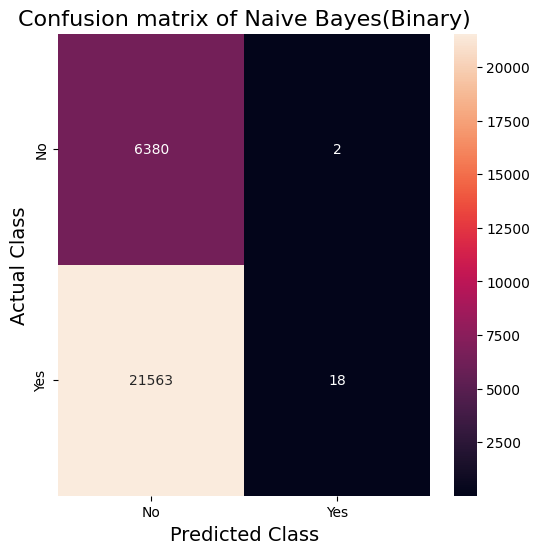

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of Naive Bayes(Binary)',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [8]:
#Array formatted Confusion matrix
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Pet Allowed','Pet Not Allowed')), 
categories = ['Pet Allowed','Pet Not Allowed'])
Actual = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Pet Allowed','Pet Not Allowed')), 
categories = ['Pet Allowed','Pet Not Allowed'])

pd.crosstab(Actual, Predicted, 
            rownames=['Predicted Class'], 
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Pet Allowed,Pet Not Allowed,Total Amount
Predicted Class,,,
Pet Allowed,18,2,20
Pet Not Allowed,21563,6380,27943
Total Amount,21581,6382,27963
